In [45]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return result

In [4]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

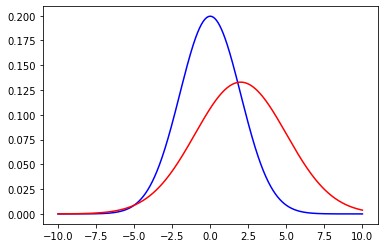

In [5]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [8]:
kl(p, q)

349.91348337868124

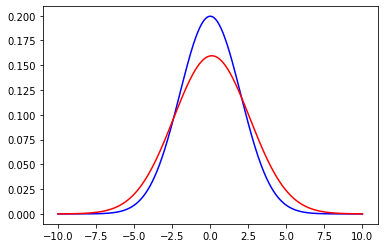

In [9]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [10]:
kl(p, q)

43.94620233653506

In [12]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


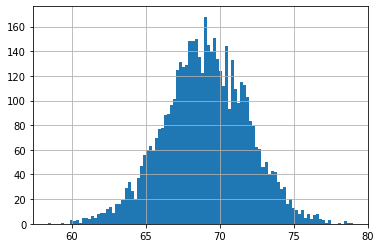

In [30]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [26]:
males.describe()['mean']

69.02634590621737

In [27]:
males.describe()['std']

2.8633622286606517

In [29]:
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [32]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
print(ideal)

[68.53106533 68.04633802 66.56220974 ... 70.05636974 67.87007233
 67.82818178]


In [33]:
icount, idevision = np.histogram(ideal, bins=100)
print(icount)
print(idevision)

[  1   0   0   0   0   1   0   3   2   8   3   3   2   6   4  10  11  17
  17  20  15  22  24  36  30  33  42  40  45  44  72  58  98  81  86  94
 109  76 102 122 121 114 137 137 123 173 147 148 143 135 161 140 144 130
 137 126 139 115  94 102  95 101  88  91  62  57  58  45  59  48  38  44
  31  30  17  13  17  24  11   9  13   4   5   5   9   4   4   3   1   1
   1   3   0   0   1   1   1   0   2   1]
[58.73373888 58.94814281 59.16254673 59.37695066 59.59135458 59.80575851
 60.02016244 60.23456636 60.44897029 60.66337421 60.87777814 61.09218207
 61.30658599 61.52098992 61.73539384 61.94979777 62.1642017  62.37860562
 62.59300955 62.80741347 63.0218174  63.23622133 63.45062525 63.66502918
 63.8794331  64.09383703 64.30824096 64.52264488 64.73704881 64.95145273
 65.16585666 65.38026059 65.59466451 65.80906844 66.02347236 66.23787629
 66.45228022 66.66668414 66.88108807 67.09549199 67.30989592 67.52429985
 67.73870377 67.9531077  68.16751163 68.38191555 68.59631948 68.8107234
 69.025127

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   2.,   8.,   3.,
          3.,   2.,   6.,   4.,  10.,  11.,  17.,  17.,  20.,  15.,  22.,
         24.,  36.,  30.,  33.,  42.,  40.,  45.,  44.,  72.,  58.,  98.,
         81.,  86.,  94., 109.,  76., 102., 122., 121., 114., 137., 137.,
        123., 173., 147., 148., 143., 135., 161., 140., 144., 130., 137.,
        126., 139., 115.,  94., 102.,  95., 101.,  88.,  91.,  62.,  57.,
         58.,  45.,  59.,  48.,  38.,  44.,  31.,  30.,  17.,  13.,  17.,
         24.,  11.,   9.,  13.,   4.,   5.,   5.,   9.,   4.,   4.,   3.,
          1.,   1.,   1.,   3.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,
          1.]),
 array([58.73373888, 58.94814281, 59.16254673, 59.37695066, 59.59135458,
        59.80575851, 60.02016244, 60.23456636, 60.44897029, 60.66337421,
        60.87777814, 61.09218207, 61.30658599, 61.52098992, 61.73539384,
        61.94979777, 62.1642017 , 62.37860562, 62.59300955, 62.80741347,
        63.0218174 , 63.23

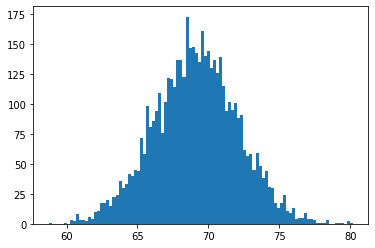

In [35]:
plt.hist(ideal, bins=100)

In [36]:
kl(count, icount)

/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


232.540036848564

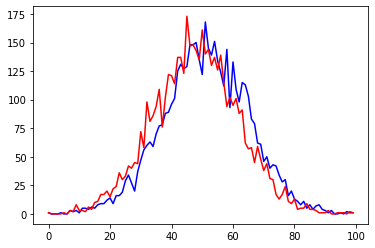

In [37]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')

In [41]:
count = count / 5000

In [43]:
icount = icount / 5000

In [44]:
kl(count, icount)

/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


0.04650800736971279

In [57]:
idealp = poisson.rvs(males.describe()['mean'], size=len(males))
ipcount, ipdevision = np.histogram(idealp, bins=100)

In [61]:
ipcount = ipcount / 5000

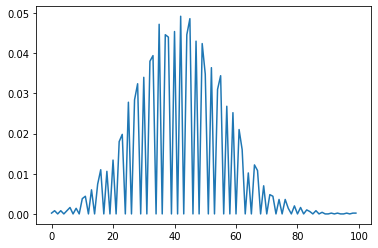

In [62]:
plt.plot(ipcount)

In [63]:
kl(ipcount, count)

/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


0.7756360678832495